*Python Machine Learning 2nd Edition* by [Sebastian Raschka](https://sebastianraschka.com), Packt Publishing Ltd. 2017

Code Repository: https://github.com/rasbt/python-machine-learning-book-2nd-edition

Code License: [MIT License](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/LICENSE.txt)

In [1]:
from IPython.display import Image
import numpy as np

# Implementing a Perceptron learning algorithm in Python

## An object-oriented perceptron API

In [2]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) #Draw random samples from a normal (Gaussian) distribution.
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Training a perceptron model on the Iris dataset

### Reading-in the Iris data

In [4]:
from sklearn.datasets import load_iris

In [53]:
import pandas as pd

data = load_iris()

df = pd.DataFrame(data['data'],columns=data['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [56]:
#data['target']

In [58]:
df['y'] =  data['target_names'][data['target']]

In [59]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Plotting the Iris data (the first 100 rows are only samples of Iris-setosa and Iris-versicolor)

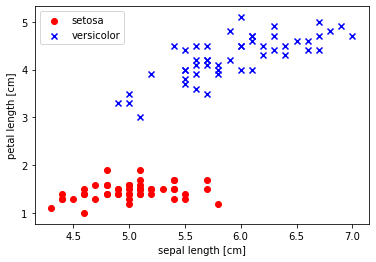

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')


plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

### Training the perceptron model to predict if the sample is Iris-setosa class

In [61]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)



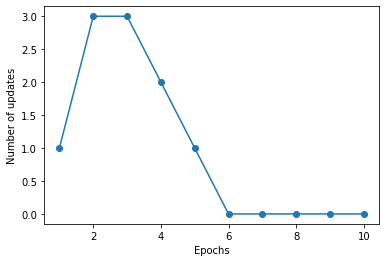

In [62]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [64]:
from sklearn.linear_model import Perceptron

### Multilayer perceptron Scikit Learn

In [19]:
 from sklearn.neural_network import MLPClassifier

In [46]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)

In [47]:
X = df.values[:,:-1]
y = df.iloc[:, 4].values
y = np.where(y == 'setosa', -1, 1)

In [48]:
clf.fit(X,y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [49]:
clf.score(X,y)

0.6666666666666666

In [52]:
clf.coefs_

[array([[-0.13550234, -0.21258099, -0.81630882, -0.36725299, -0.57684452],
        [-0.66570748, -0.75265383, -0.25219797, -0.1871254 ,  0.06338738],
        [-0.13195465, -0.19338458, -0.48262687,  0.57631349, -0.7717719 ],
        [ 0.27837194, -0.30918755,  0.09583997, -0.59711852, -0.49299761]]),
 array([[ 0.61132128, -0.64284597, -0.7140924 , -0.5114959 ,  0.58581514],
        [-0.62223766, -0.1231535 ,  0.19888619,  0.05296059,  0.58590248],
        [-0.28580161,  0.28892565,  0.51839924, -0.74626369,  0.38752144],
        [ 0.75733943,  0.38533426, -0.34688398,  0.44842289, -0.60930473],
        [-0.0807229 ,  0.63299267, -0.3197312 , -0.32877663, -0.57315658]]),
 array([[-0.89327383],
        [ 0.34531812],
        [-0.29998225],
        [ 0.17872613],
        [ 0.58933617]])]

ValueError: cannot reshape array of size 4 into shape (28,28)

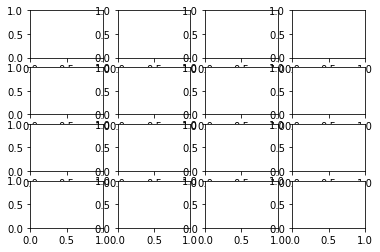

In [51]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = clf.coefs_[0].min(), clf.coefs_[0].max()
for coef, ax in zip(clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())